[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/CU-Denver-MathStats-OER/ODEs/blob/main/Chp1/00-Introduction.ipynb)


# <a name="PlotIntro"> A Brief Overview of Plotting with R</a>
---

Plots can provide a useful visual summary of the data. Sometimes, a nice plot or two is all that is need for statistical analysis. In this document, we cover a basic overview of creating some plots in R.

Here’s a link to a more thorough coverage of plotting in R:
<https://r-graph-gallery.com/index.html>.



# Table of Contents

- [Finding Help Documentation](#FindHelp)
- [What Are Packages?](#packages)
- [Summarizing `storms` Data](#storms)

-   Plotting [One Quantitative Variable](#onequant)
  - [Histograms](#histogram)
  - [Density Plots](#density)
  - [Boxplots](#boxplot)
-   Plotting [One Qualitative Variable](#onequal)
  - [Checking Data Type](#typeof)
  - [Creating Bar Charts from Tables](#table)
  - [Relative Frequency Bar Charts](#relative)
  - [Pie Charts](#piechart)
  - [Bar chart method 2: Converting to `factor` and Then `plot()`](#factors)
-   Plotting the Relationship Between [One Quantitative and One Qualitative Variable](#quant-qual)
    - [Side by Side Boxplots](#side-by-side-box) with `plot()`
    - [Subset of Boxplots](#subset)
-   Plotting the Relationship Between [Two Qualitative Variables](#two-qual)
  - [Stacked Bar Charts](#stacked)
  - [Clustered Bar Charts](#clustered)
-   Plotting the Relationship Between [Two Quantitative Variables](#two-quant)
  - scatter plots.
-   [Arranging Multiple Plots in an
    Array](#arranging-multiple-plots-in-an-array)
-   [Optional: More Advanced Plots with
    `ggplot2`](#optional-more-advanced-plots-with-ggplot2)
-   [Optional: Spatial Plots with
    `mapview`](#optional-spatial-plots-with-mapview)


# <a name="FindHelp">Finding Help Documentation</a>
---

The plotting functions introduced in this document have robust help documentation with lots of options to customize your plots. If you want to view help documentation for any of the functions used in this document, run commands such`?hist`, `?plot`, `?table`, and so on.



In [25]:
# Access help documentation for hist
?hist  #Side panel should open with help doc

# <a name="packages">What Are Packages?</a>
---

`R` packages are a collection functions, sample data, and/or other code scripts. `R` installs a set of default packages during installation. In this case, we are working with `R` in a cloud using Google Colaboratory. The files, code, and data associated to installed packages are saved in the cloud and not locally on your computer. Many `R` packages have already been installed.

**Run the code cell below to get a list of all default `R` packages available in Google Colaboratory.**



In [26]:
# See a list of installed default packages
allpack <- installed.packages()
rownames(allpack)

[1] "IRdisplay"     "IRkernel"      "pbdZMQ"        "repr"         
  [5] "askpass"       "backports"     "base64enc"     "bit"          
  [9] "bit64"         "blob"          "brew"          "brio"         
 [13] "broom"         "bslib"         "cachem"        "callr"        
 [17] "cellranger"    "cli"           "clipr"         "colorspace"   
 [21] "commonmark"    "cpp11"         "crayon"        "credentials"  
 [25] "curl"          "data.table"    "DBI"           "dbplyr"       
 [29] "desc"          "devtools"      "diffobj"       "digest"       
 [33] "dplyr"         "dtplyr"        "ellipsis"      "evaluate"     
 [37] "fansi"         "farver"        "fastmap"       "forcats"      
 [41] "fs"            "gargle"        "generics"      "gert"         
 [45] "ggplot2"       "gh"            "gitcreds"      "glue"         
 [49] "googledrive"   "googlesheets4" "gtable"        "haven"        
 [53] "highr"         "hms"           "htmltools"     "httr"         
 [57] "httr2"         "ids"           "ini"           "isoband"      
 [61] "jquerylib"     "jsonlite"      "knitr"         "labeling"     
 [65] "lifecycle"     "lubridate"     "magrittr"      "memoise"      
 [69] "mime"          "modelr"        "munsell"       "openssl"      
 [73] "pillar"        "pkgbuild"      "pkgconfig"     "pkgload"      
 [77] "praise"        "prettyunits"   "processx"      "progress"     
 [81] "ps"            "purrr"         "R6"            "rappdirs"     
 [85] "rcmdcheck"     "RColorBrewer"  "readr"         "readxl"       
 [89] "rematch"       "rematch2"      "remotes"       "reprex"       
 [93] "rlang"         "rmarkdown"     "roxygen2"      "rprojroot"    
 [97] "rstudioapi"    "rversions"     "rvest"         "sass"         
[101] "scales"        "selectr"       "sessioninfo"   "stringi"      
[105] "stringr"       "svglite"       "sys"           "systemfonts"  
[109] "testthat"      "tibble"        "tidyr"         "tidyselect"   
[113] "tidyverse"     "timechange"    "tinytex"       "tzdb"         
[117] "usethis"       "utf8"          "uuid"          "vctrs"        
[121] "viridisLite"   "vroom"         "waldo"         "whisker"      
[125] "withr"         "xfun"          "xml2"          "xopen"        
[129] "yaml"          "zip"           "base"          "boot"         
[133] "class"         "cluster"       "codetools"     "compiler"     
[137] "datasets"      "foreign"       "graphics"      "grDevices"    
[141] "grid"          "KernSmooth"    "lattice"       "MASS"         
[145] "Matrix"        "methods"       "mgcv"          "nlme"         
[149] "nnet"          "parallel"      "rpart"         "spatial"      
[153] "splines"       "stats"         "stats4"        "survival"     
[157] "tcltk"         "tools"         "utils"

## <a name="loadpack">Loading Packages with the `library` command.</a>
---

Each time we start or restart a new session and want to access the library of functions and data in the package, we need to load the library of files in the package with the `library` command.

To demonstrate how to create common statistical plots in `R`, we will use the `storms` dataset which is located in the package `dplyr`.

- The `dplyr` package is already installed in Google Colaboratory
-  We still need to use a `library` command to load the package.
- **Run the code cell below to load the `dplyr` package.**




In [1]:
# load the library of functions and data in dplyr
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# <a name="storms">Summarizing `storms` Data</a>
---

The package `dplyr` contains a dataset called `storms`. Let’s find some useful information about this data.

- The first code cell below will open the help manual for `storms` in a side bar.
  - Fell free to close the help side bar.
- The sceond code cell below will provide a numeric summary of all variables in the `storms` data.
- Recall we need to first run the command `library(dplyr)` in the code cell above to be able to access `storms`.

In [2]:
?storms  # must load dplyr

In [3]:
# See a summary of all variables
summary(storms)

     name                year          month             day       
 Length:19066       Min.   :1975   Min.   : 1.000   Min.   : 1.00  
 Class :character   1st Qu.:1993   1st Qu.: 8.000   1st Qu.: 8.00  
 Mode  :character   Median :2004   Median : 9.000   Median :16.00  
                    Mean   :2002   Mean   : 8.699   Mean   :15.78  
                    3rd Qu.:2012   3rd Qu.: 9.000   3rd Qu.:24.00  
                    Max.   :2021   Max.   :12.000   Max.   :31.00  
                                                                   
      hour             lat             long                         status    
 Min.   : 0.000   Min.   : 7.00   Min.   :-109.30   tropical storm     :6684  
 1st Qu.: 5.000   1st Qu.:18.40   1st Qu.: -78.70   hurricane          :4684  
 Median :12.000   Median :26.60   Median : -62.25   tropical depression:3525  
 Mean   : 9.094   Mean   :26.99   Mean   : -61.52   extratropical      :2068  
 3rd Qu.:18.000   3rd Qu.:33.70   3rd Qu.: -45.60   other low

# <a name="onequant">One Quantitative Variable</a>
---

Often a graph or plot is a more preferred format to summarize a variable than a summary statistics. The documentation below explains we could graphically summarize the quantitative variable `pressure`.

## <a name="histogram">Histograms</a>
---

The `hist` function can be used create a
<font color='dodgerblue'>**histogram**</font> of a numerical vector.

-  See histogram documentation: <https://r-graph-gallery.com/histogram.html>
- Like making colorful plots? [Here’s a guide to colors in R](https://bookdown.org/hneth/ds4psy/D-3-apx-colors-basics.html).
- We use a `$` symbol to indicate the name of the variable in `storms` we will access in the plot.

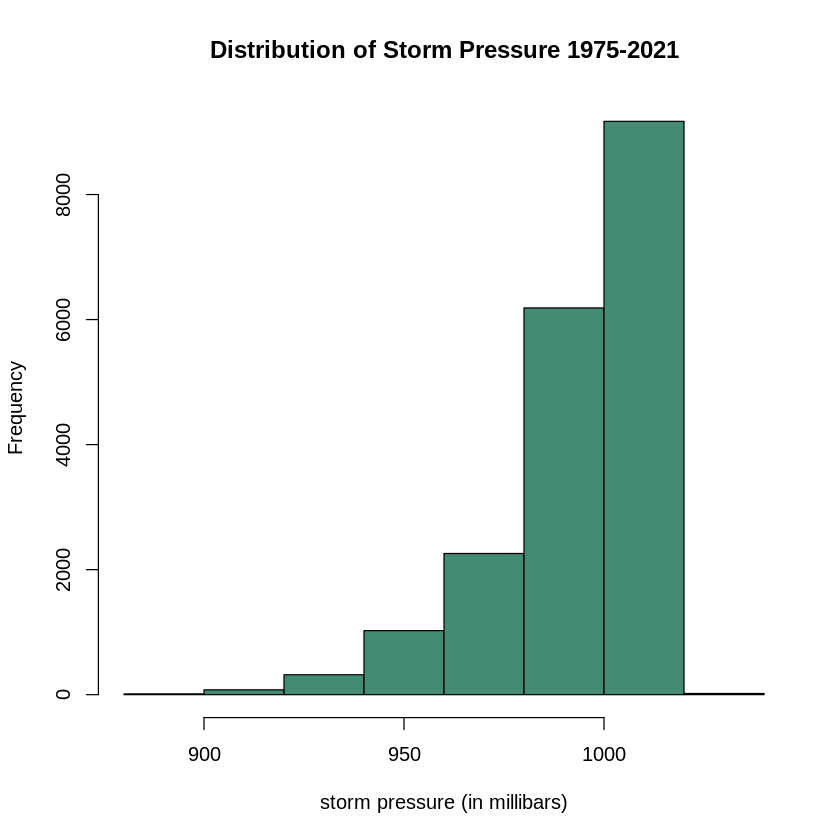

In [37]:
hist(storms$pressure,  # plot pressure variable in storms data
     xlab = "storm pressure (in millibars)",  # x-axis label
     main = "Distribution of Storm Pressure 1975-2021",  # main title
     breaks = 10,  # number of breaks or bins
     col = "aquamarine4")  # color of bars

## <a name="density">Density Plots</a>
---

A histogram is more sensitive to its options. For example, a histogram with 3 breaks may tell a different story than plotting the same data with 20 breaks.

Thus, we may prefer to use a <font color='dodgerblue'>**density
plot**</font>.

- If a variable is quantitative, the `plot()` command will create a density plot of the variable.
- See more advanced density plot documentation at <https://r-graph-gallery.com/density-plot.html>.
- If a variable is categorical, we will see `plot()` will create a different plot appropriate for a categorical variable.

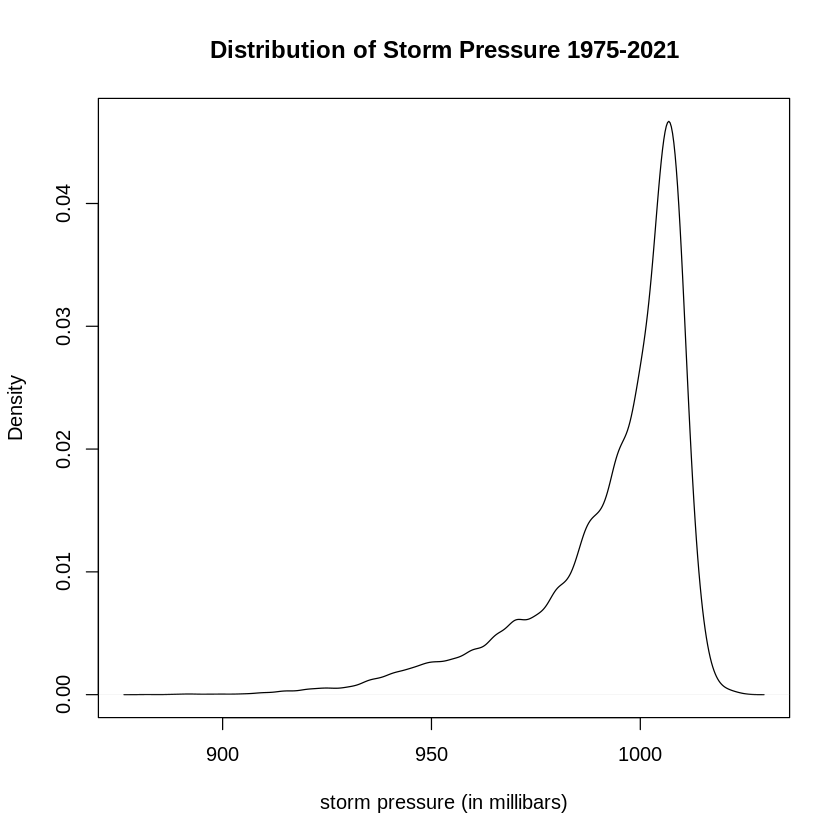

In [38]:
plot(density(storms$pressure),
     xlab = "storm pressure (in millibars)",
     main = "Distribution of Storm Pressure 1975-2021")

## <a name="boxplot">Boxplots</a>

---

<font color='dodgerblue'>**Boxplots**</font> are another useful plot
for presenting the distribution of a quantitative variable using quartiles and the five number summary.

-  See boxplot documentation at <https://r-graph-gallery.com/boxplot.html>.
- Run the command `?boxplot` to see more options.

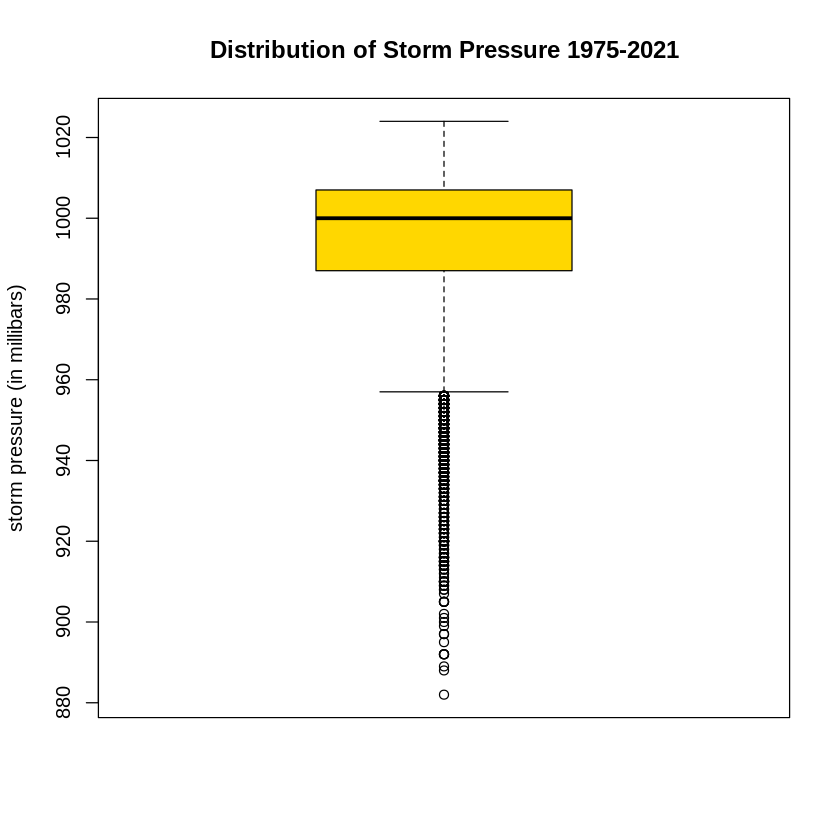

In [39]:
boxplot(storms$pressure,
        ylab = "storm pressure (in millibars)",  # horizontal axis label
        col = "gold",  # color of box
        main = "Distribution of Storm Pressure 1975-2021")  # main title

### Changing the Layout of Boxplots
---

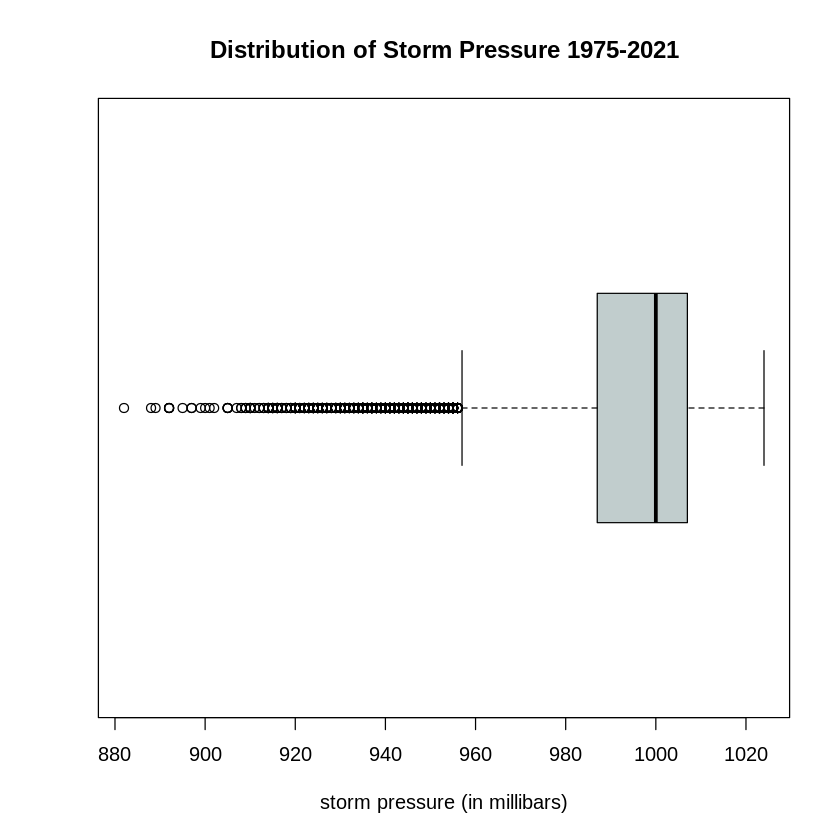

In [40]:
boxplot(storms$pressure,
        horizontal = TRUE,  # display horizontally
        xlab = "storm pressure (in millibars)",  # horizontal axis label
        main = "Distribution of Storm Pressure 1975-2021",
        col = "azure3")

# <a name="onequal">One Qualitative Variable</a>
---

Qualitative (also called categorical) variables required other types of plots. For example, we cannot create a density or boxplot for a qualitiative variable. Qualitative variables may be stored as characters (such as the `status` variable) or values (such as the `category` variable). This brings up a good question:

> How can we tell whether a variable is stored as a numerical variable, a categorical variable, or perhaps as a string of characters?


## <a name="typeof">Checking the Data Type</a>
---

**The `typeof()` command can help identify what is the type of a variable.**


In [4]:
typeof(storms$status)
typeof(storms$category)

[1] "integer"

[1] "double"

### <a name="datatypes">Data Types</a>
---

From the output above, we see:

-   The variable `status` is initially read as an `integer`.
  - The individual values are **strings of characters** such as "tropical storm" or "hurricane".
  - The summary statistics of `status` are **counts** that are stored as integers.
-   The variable `category` is initially read as `double` or decimal values.
  - The individual values are ordinal integers "1", "2", "3", "4", and "5" for category of hurrican. 
  - There are 14,2328 `NA` (or missing) values corresponding to the observations that are not hurricanes.
  - The summary statistics of `category` (such as the mean) are stored decimals.
  - However, we would like to treat `category` as a qualitative variable and we plot how many storms fall into each category.

## <a name="caution">Caution with Data Types and Using `plot()`</a>
---

If we try to use the general `plot()` function, R will give its best
guess at which plot makes the most sense to display the data. If the data is stored as the wrong data type, `plot()` will not work as we might expect.

- Run the two code cells below, and notice the following:
  - The output of the `plot(storms$status)` looks like a reasonable barplot.
  - The output of `plot(storms$category)` does not nicely summarize the counts of how many storms are in each category.



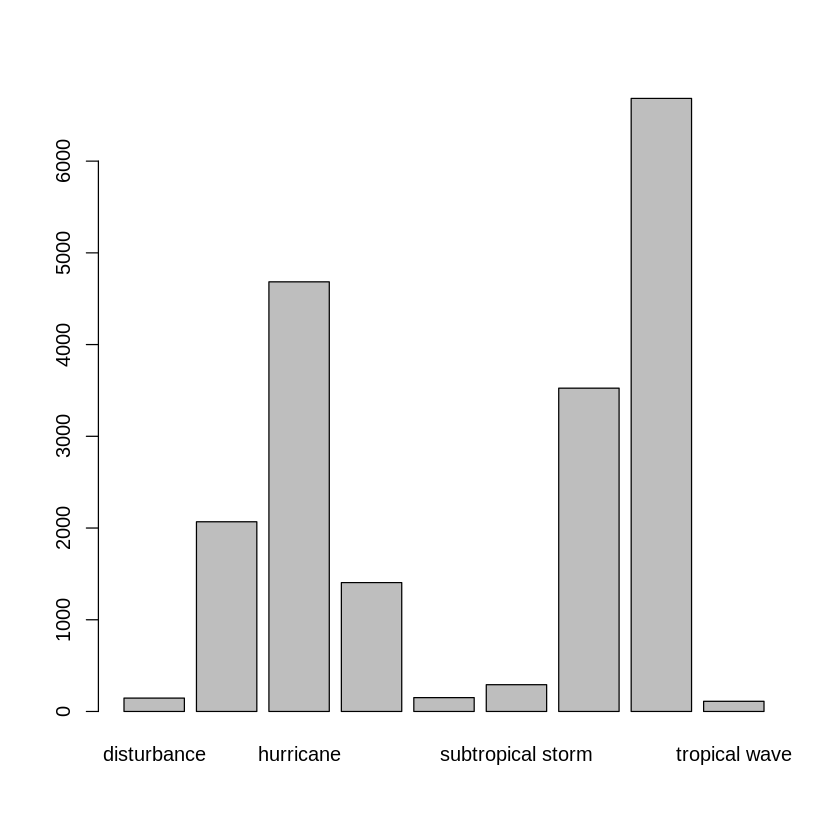

In [9]:
plot(storms$status)  # plot of status

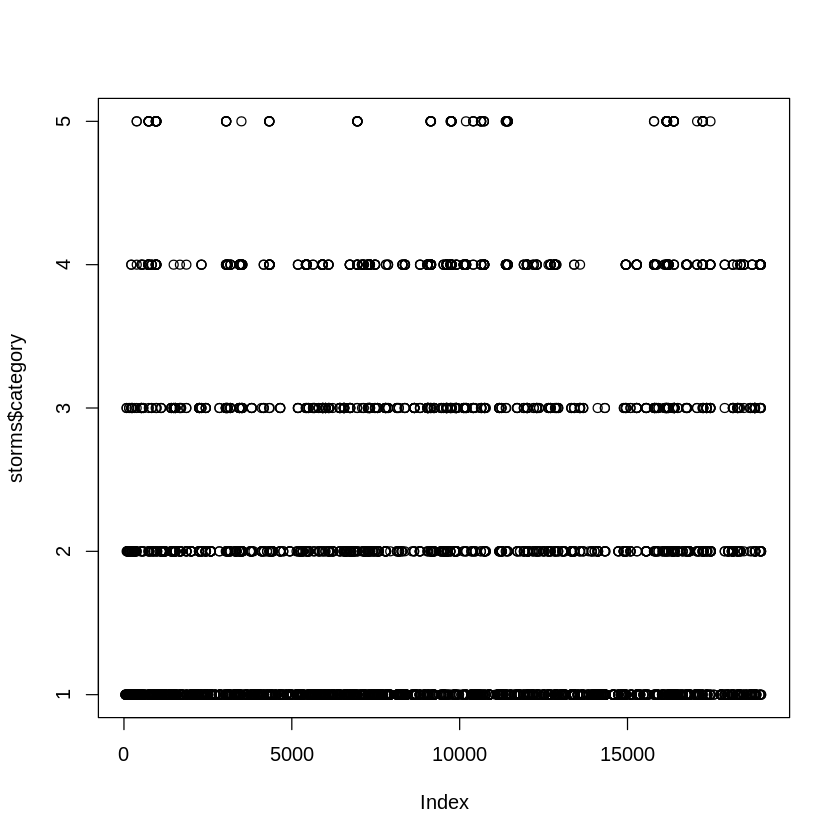

In [10]:
plot(storms$category)  # plot of category

## <a name="table">Creating Bar Charts From Tables</a>
---

The `table()` will count the number of times a value (or string
of characters) occurs in a vector or variable.

-   [Official Documentation Page for    `table()`](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/table)
-   [Another nice resource with examples](https://www.statology.org/table-function-in-r/)

One way to improve the initial plot of categories above is as follows:

1. First use the `table()` command to count how many storms are in each category, and
2. Then create a bar chart using the `barplot()` function.

In [11]:
cat.table <- table(storms$category)  # create table of counts
cat.table  # print table to screen


   1    2    3    4    5 
2478  973  579  539  115 

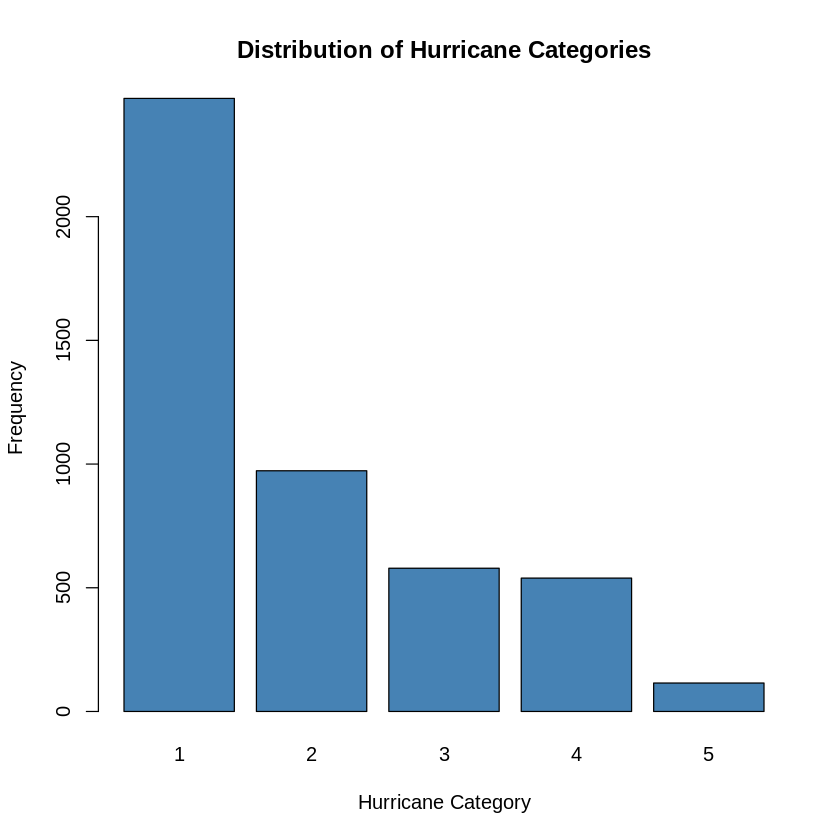

In [27]:
barplot(cat.table, 
        main = "Distribution of Hurricane Categories",
        xlab = "Hurricane Category",
        ylab = "Frequency",
        col = "steelblue")

## <a name="relative">Relative Frequency Tables and Barplots</a>
---

If instead of plotting the number of hurricanes in each category we wish to plot the proportion of all hurricanes in each category we can use the `prop.table()` instead of `table()`.

**Run the two code cells below to create a relative frequency barplot.**

1. We input our previous table of counts, `cat.table`, into the function `prop.table()` to convert counts to proportions.
2. Then we create a bar chart of the resulting proportions.

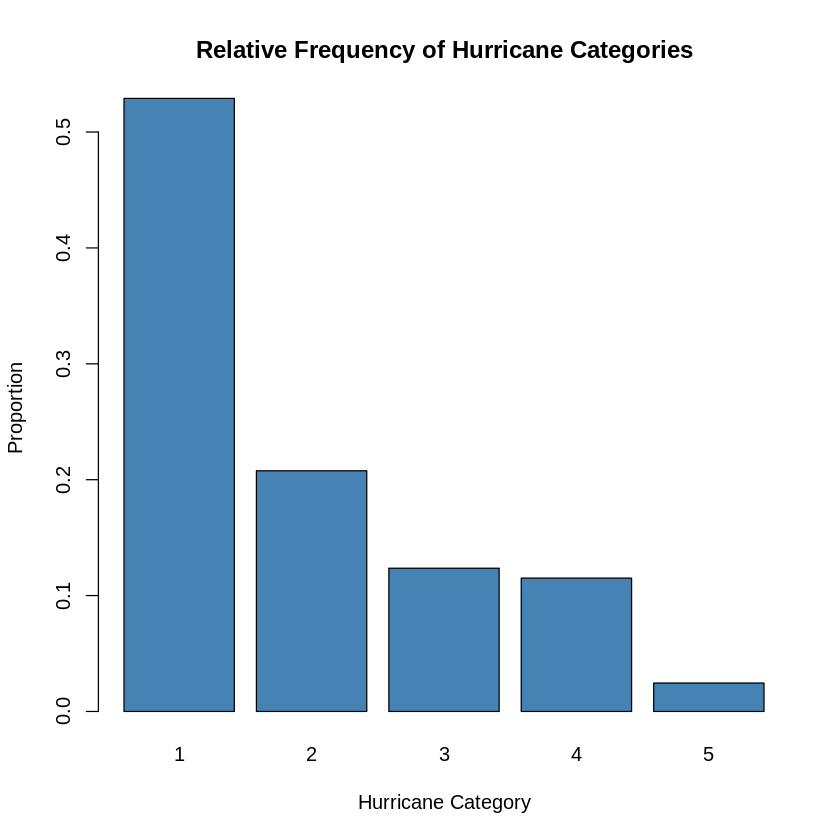

In [26]:
cat.prop <- prop.table(cat.table)  # create table of proportions
barplot(cat.prop, 
        main = "Relative Frequency of Hurricane Categories",
        xlab = "Hurricane Category",
        ylab = "Proportion",
        col = "steelblue")

### Caution with `prop.table()`
---

- The input into `prop.table()` must be a table in order to generate a barplot in the end.
-  The command below returns an error since we did not first create a table of counts from `storms$category` as we did above.

In [ ]:
barplot(prop.table(storms$category)) 

In [41]:
barplot(status.prop, main = "Relative Frequency of Storm Status",
        ylab = "Proportion",
        col = "steelblue")

ERROR: ignored

## <a name="piechart">Pie Charts with `pie()`</a>

---

<font color='dodgerblue'>**Pie charts**</font> can also be used to illustrate the distribution of one qualitative variable.

-   See <https://r-graph-gallery.com/pie-plot.html>.
-   For help and a list of options, you can run `?pie`.

In [30]:
?pie

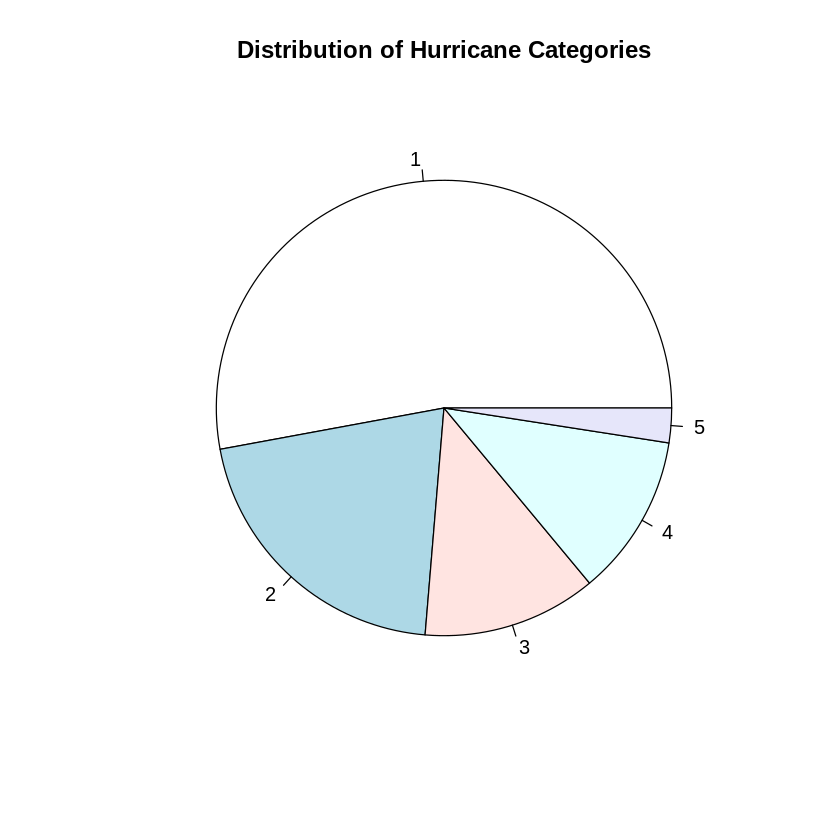

In [29]:
pie(cat.table,
    main = "Distribution of Hurricane Categories")

## <a name="factors"> Converting to a `factor()` and Then `plot()`</a>
---

One common issue with a qualiatative variable is that it is often stored as the wrong datatype.

-  Qualitative data are typically stored as a `factor` datatype.

Another way we can create a barplot of the counts in each category is to:

1. First convert the qualitative variable to a factor datatype. 
2. Then use `plot()` to create an appropriate plot.

**Run the code cell below to first see the summary output of the `category` variable after converting it to a `factor`.

In [42]:
storms2 <- storms  # creates a second copy so we don't overwrite storms

storms2$category <- factor(storms$category)  # convert category to factor
summary(storms2$category)  # get new summary of categories

1     2     3     4     5  NA's 
 2478   973   579   539   115 14382


Notice the summary is a table of counts in each hurrican category.

-  Once the variable `status` is converted to a `factor`, the `plot()` function will know to use a barplot to give a summary display.

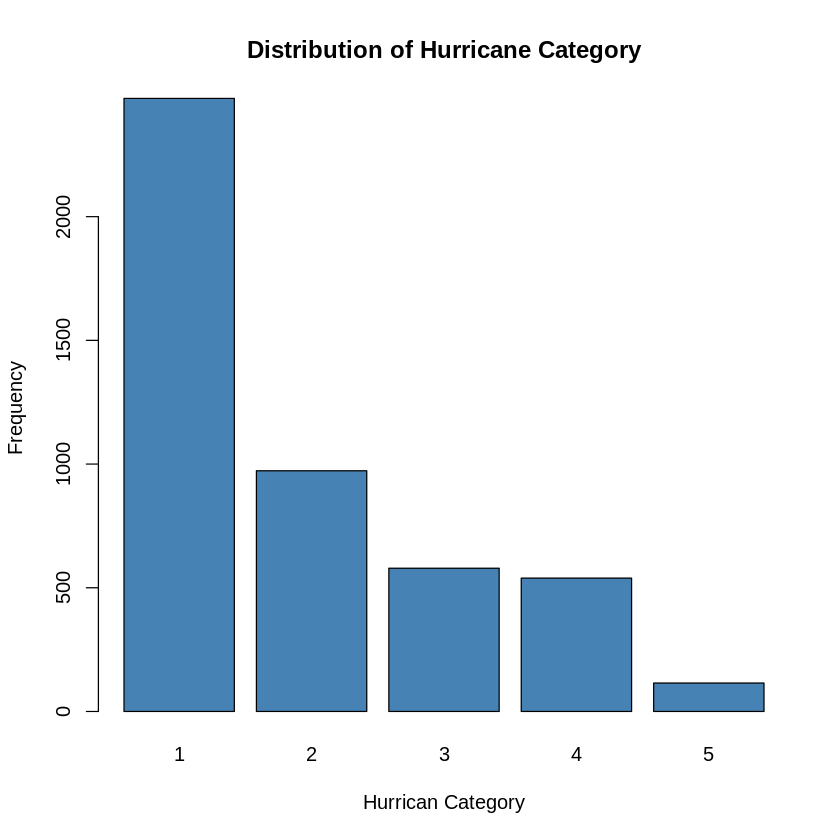

In [43]:
plot(storms2$category,
     main = "Distribution of Hurricane Category",
     xlab = "Hurrican Category",
     ylab = "Frequency", 
     col = "steelblue")

- Recall 2ithout first changing `category` to a `factor`, `plot()` will create a different graph.

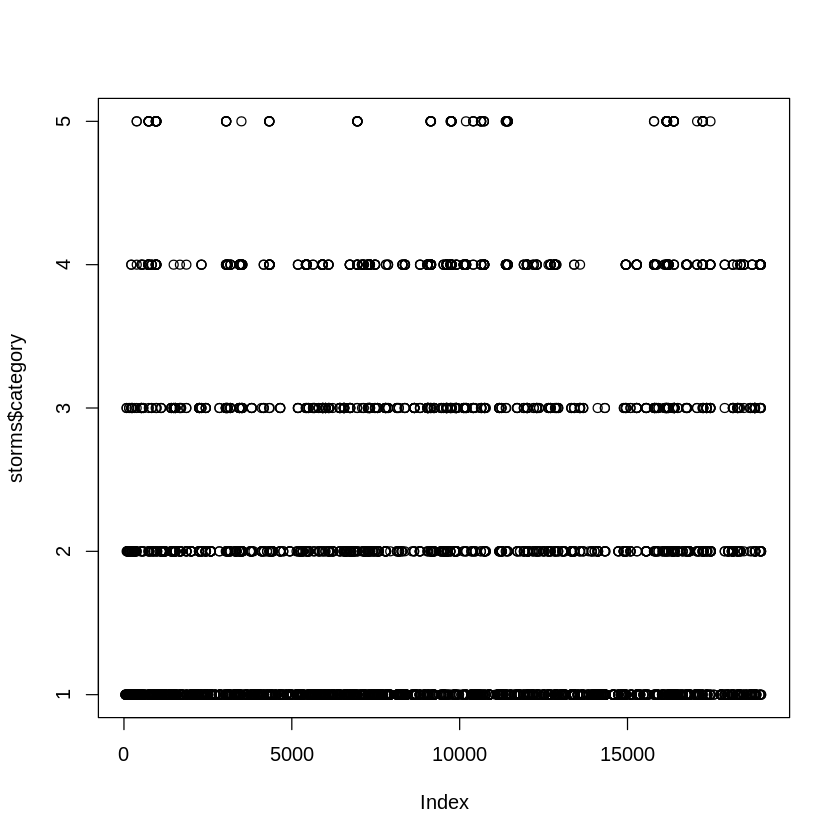

In [45]:
plot(storms$category)

# <a name="quant-qual">Plotting One Quantitative and One Qualitative Variable</a>
---

Imagine we would like to compare the wind speeds of tropical storms,
hurricanes, and tropical depressions. In this case, we would like to compare a quantitative variable (`wind`) for different classes of a qualitative variable (`status`).



## <a name="side-by-side-box">Side by Side Boxplots</a>
---

There are three classes of storms status in `storms`: "tropical storm", "tropical depression", and "hurricane".

In the storms data:

- `wind` is a quantitative variable.
- `status` is a qualitative variable.
- We can use the default `plot()` function to create a side by side boxplots.

-   We can subset the data frame into three separate dataframes, one for each status of storm.
-   Then make three separate boxplots of the wind speeds for each `status`.

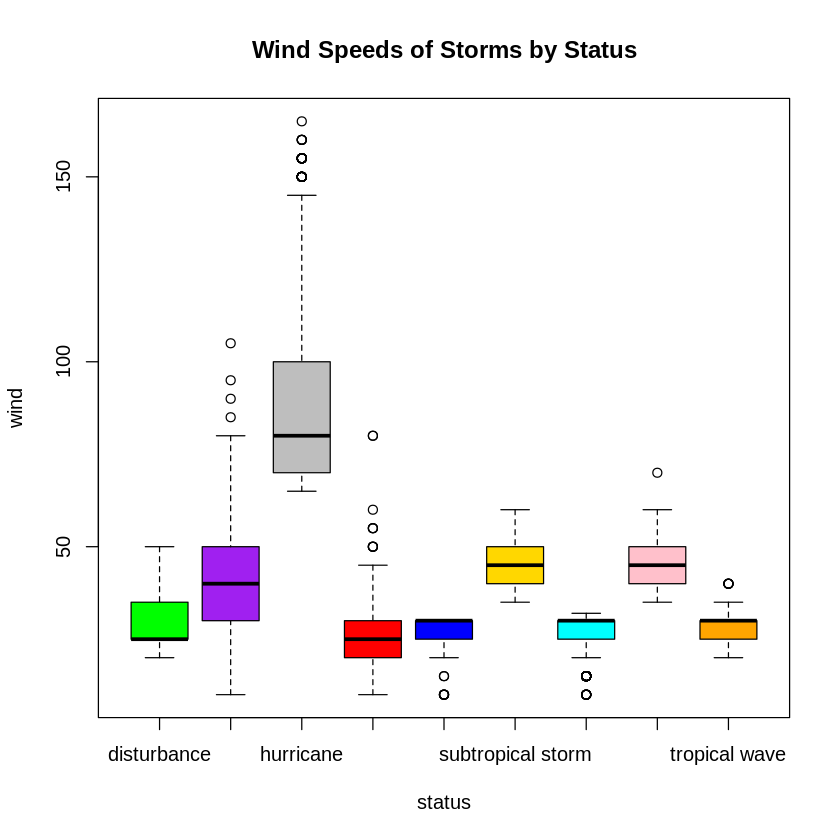

In [57]:
plot(wind ~ status,  # quantiative first ~ categorical second
     data = storms,  # name of dataframe
     col = c("green", "purple", "grey", "red", 
       "blue", "gold", "cyan", "pink", "orange"),  # colors
     main = "Wind Speeds of Storms by Status")  # main title


### Adding a Legend to a Plot
---

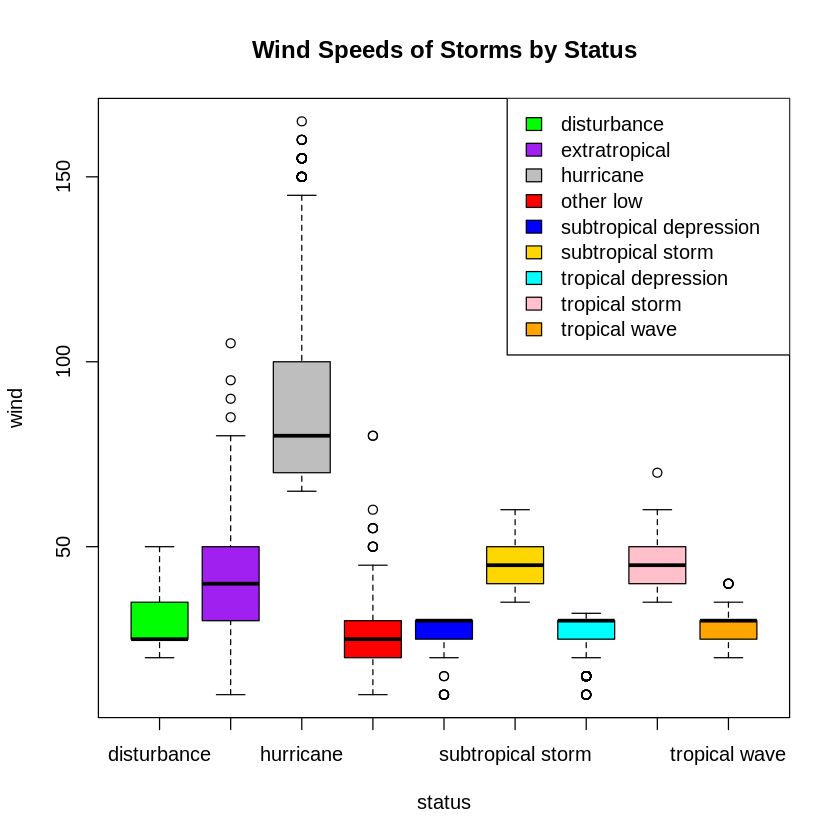

In [59]:
status.table <- table(storms$status)  # create table to store classes

plot(wind ~ status, 
     data = storms, 
     col = c("green", "purple", "grey", "red", 
       "blue", "gold", "cyan", "pink", "orange"),
     main = "Wind Speeds of Storms by Status")

# We can add a legend to list identify storm status
legend(x = "topright", legend=rownames(status.table),  # each row of table is label in legend
       fill = c("green", "purple", "grey", "red", 
       "blue", "gold", "cyan", "pink", "orange"))

## <a name="subset">Subsetting Data by Category</a>
---

There are many classes of storms status in `storms`. Often, we want to only focus on a smaller subset of classess. We can restrict our attention to compare the wind speeds of three of the classes: "tropical storm", "tropical depression", and "hurricane".


-   We can <font color="dodgerblue">subset</font> `storms` dataframe into three separate dataframes, one for each status of storm, using the `subset()` function.
-   Then we can create three separate boxplots of the wind speeds for each status.

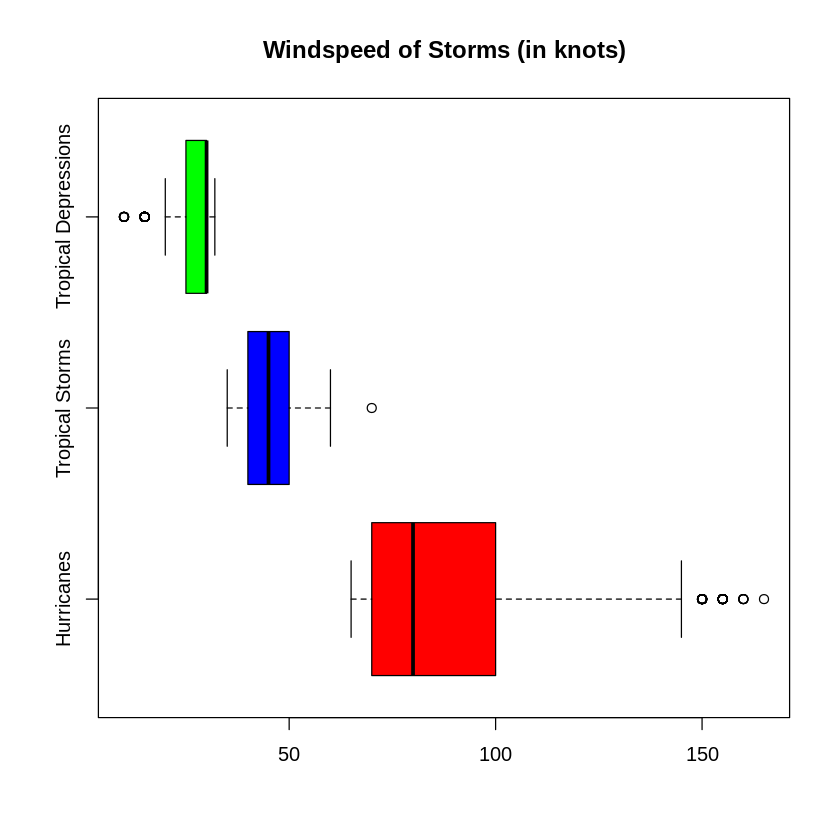

In [60]:
# split data by storm status
hur <- subset(storms, status == "hurricane", select = wind)
trop.storm <- subset(storms, status == "tropical storm", select = wind)
trop.dep <- subset(storms, status == "tropical depression", select = wind)

# Create side by side boxplot
boxplot(hur$wind, trop.storm$wind, trop.dep$wind, 
        main = "Windspeed of Storms (in knots)", 
        names = c("Hurricanes", "Tropical Storms", "Tropical Depressions"), 
        col = c("red", "blue", "green"), 
        horizontal = TRUE)

# <a name="two-qual">Relationship Between Two Qualitative Variables</a>
---

Imagine we would like to compare the number of different types of storms that occurred in each month. In this case, we would like to compare two qualitative variables, namely `status` and `month`.



## <a name="contingency-table">Creating Two-Way Table/a>

The command `table(x)` will count the number of times a value (or string of characters) occurs in a vector `x`.

-   [Official Documentation Page for `table()`](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/table)
-   [Nice resource with examples](https://www.statology.org/table-function-in-r/)

The command `table(x, y)` will similarly create a two-way table to compare `x` and `y`.


In [64]:
con.table <- table(storms$status, storms$month)
con.table

                        
                            1    4    5    6    7    8    9   10   11   12
  disturbance               0    0    0   13   45   25   41   14    8    0
  extratropical            29   40   18  130  135  275  732  520  175   14
  hurricane                 5    0    0   18  202 1038 2380  799  209   33
  other low                 5    0   49   82  175  317  446  219   81   31
  subtropical depression    0    4    5   35   11   36   34   22    4    0
  subtropical storm         6    3   20   12    6   23   72   66   42   42
  tropical depression       2    1   49  213  397  975 1315  413  139   21
  tropical storm           23   18   60  276  625 1696 2448 1024  443   71
  tropical wave             0    0    0    0    7   55   41    0    8    0

## <a name="grouped">Creating Grouped Frequency Bar Charts</a>

---

After creating a two-way table, we can present the results visually in a <font color='dodgerblue'>**grouped bar chart**</font>.

-  See documentation at <https://r-graph-gallery.com/211-basic-grouped-or-stacked-barplot.html>.




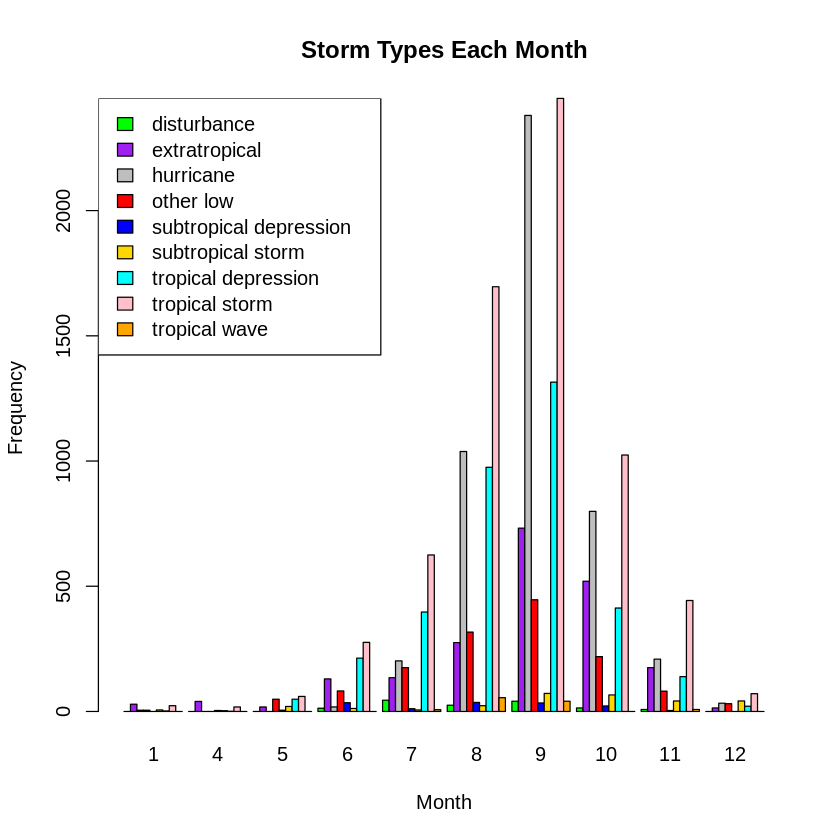

In [75]:
# create a vector of colors
my.colors <- c("green", "purple", "grey", "red", 
       "blue", "gold", "cyan", "pink", "orange") 

# create side by side bar chart
barplot(con.table,  # use counts from contingency table
        beside = TRUE,  # groups side-by-side
        main = "Storm Types Each Month",  # main title
        xlab = "Month",  # horizontal axis label
        col = my.colors,  # color of bars
        ylab = "Frequency")  # vertical axis label

legend(x="topleft",  # place legend in top left
       legend=rownames(con.table),  # get labels
       fill = my.colors)  # use same colors

## <a name="grouped">Grouped Frequency Barplots</a>
---

-   Note `beside = FALSE` is the default.
-   If we do not specify a `beside` option, a **stacked barplot** is created instead.

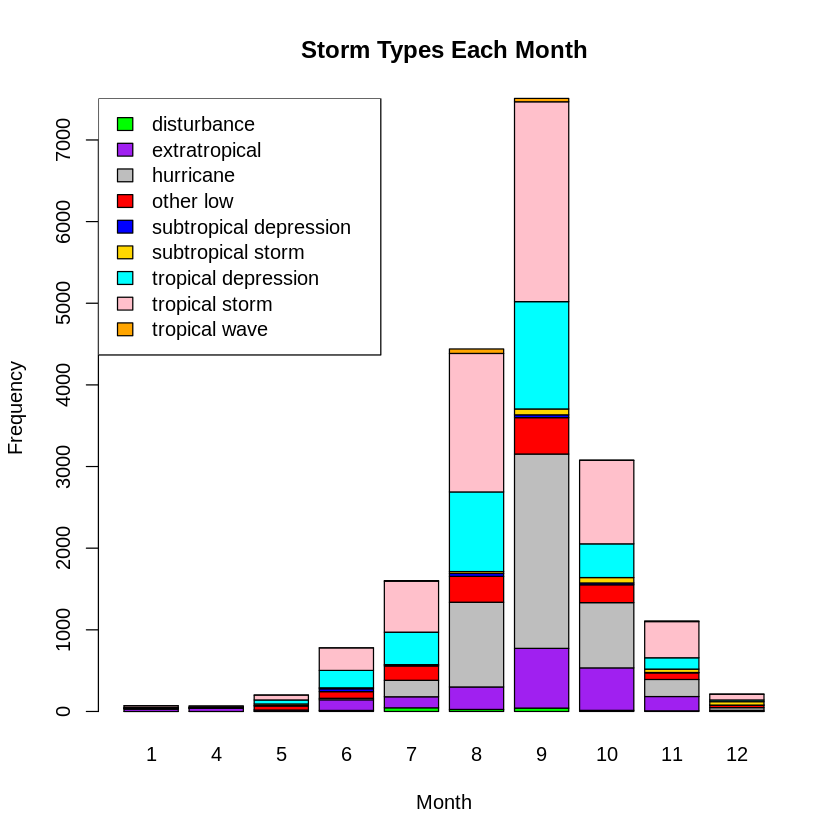

In [76]:
# create grouped bar chart
barplot(con.table,  # use counts from contingency table
        main = "Storm Types Each Month",  # main title
        xlab = "Month",  # horizontal axis label
        col = my.colors,  # color of bars
        ylab = "Frequency")  # vertical axis label

legend(x="topleft",  # place legend in top left
       legend=rownames(con.table),  # get labels
       fill = my.colors)  # use same colors

## <a name="relative-grand">Stacked Barplots Relative to Grand Total</a>
---

1.   First we create a contingency table using `table(x, y)`.
2. Then we use `prop.table([table_name])` to convert to frequencies to proportions out of the grand total.
3. Finally we can create a group bar chart of relative frequencies.

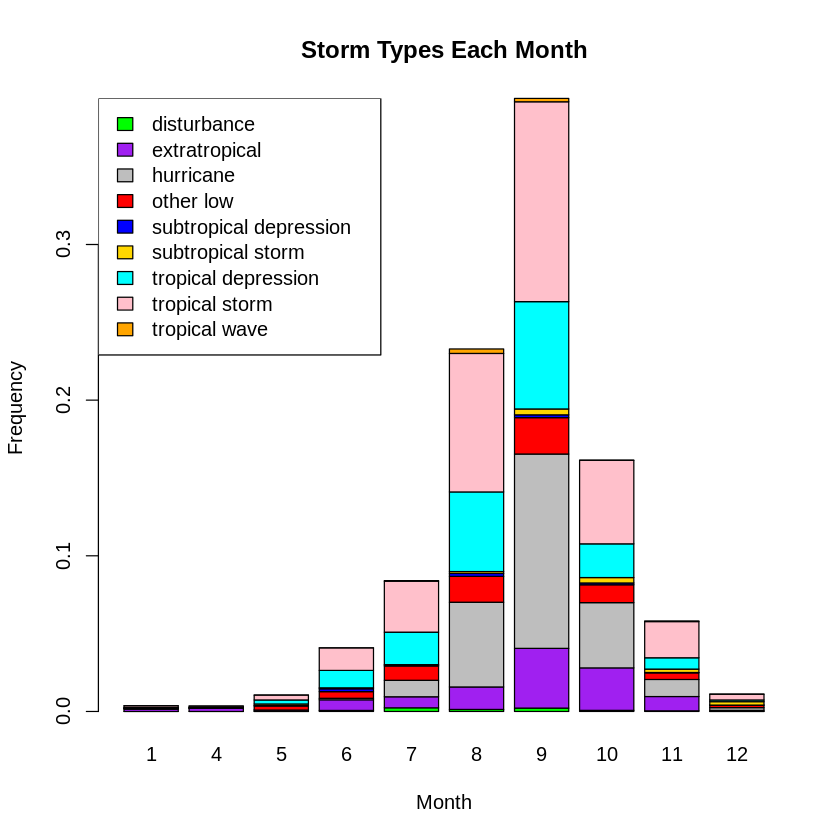

In [77]:
# create two-table of counts
con.table <- table(storms$status, storms$month)

# convert coutns to proportions
con.prop <- prop.table(con.table) 

# barplot of proportions
barplot(con.prop,  # use proportions
        main = "Storm Types Each Month",  # main title
        xlab = "Month",  # horizontal axis label
        col = my.colors,  # color of bars
        ylab = "Frequency")  # vertical axis label

legend(x="topleft",  # place legend in top left
       legend=rownames(con.table),  # get labels
       fill = my.colors)  # use same colors


### <a name="relative-row"> Stacked Bar Chart Relative to Column Totals</a>
---

Often, we would like the proportions in the table to be computed out of the total in each column (instead of the grand total).

-   We add the option `2` inside `prop.table()`.
-   In this example, each column is a different month.

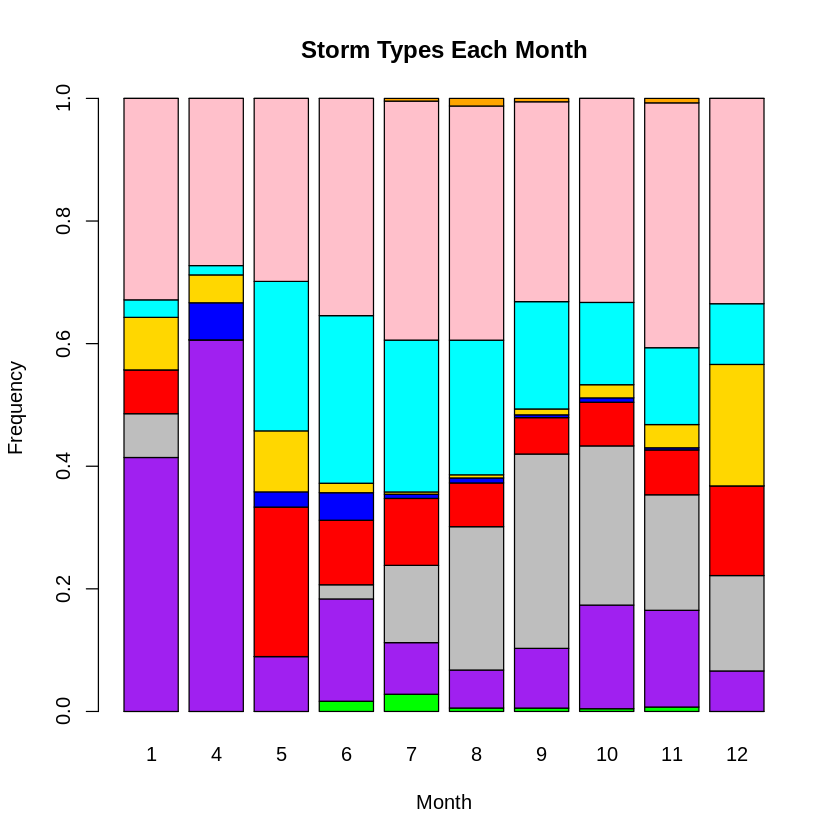

In [93]:
# create two-table of counts
con.table <- table(storms$status, storms$month)

# contingency table percentage of each column total
con.prop.month <- prop.table(con.table,2)  

# barplot of proportions
barplot(con.prop.month,  # use proportions relative to column total
        main = "Storm Types Each Month",  # main title
        xlab = "Month",  # horizontal axis label
        col = my.colors,  # color of bars
        ylab = "Frequency")  # vertical axis label

#legend(x="topright",  # place legend in top left
#       inset=c(-0.4,0),
#       xpd = TRUE,
#       legend=rownames(con.table),  # get labels
#       fill = my.colors)  # use same colors

Other times, we would like the proportions in the table to be computed
out of the total in each column.

-   We add the option `2` inside `prop.table()`.

In [ ]:
con.prop.col <- prop.table(con.table,2)  # contingency table percentage column total
con.prop.col

### Creating a Barplot from a Contingency Table

---

Now we can create a stacked relative frequency barplot.

In [ ]:
barplot(con.prop.col,
        legend=rownames(con.prop.col),
        main = "Storm Types Each Month: 1975-2020",
        xlab = "Month",
        ylab = "Proportion")

## Converting to Factors and Using `plot()`

---

-   One common issue with a categorical variable is that it is often
    stored as a data type such as characters or integers.
-   We would like observations with the same values to be group
    together.
-   Categorical data should be stored as a `factor` in R.

In [ ]:
storms.fac <- storms  # creates a second copy so we don't overwrite storms
storms.fac$status <- factor(storms$status)  # convert status to factor
storms.fac$month <- factor(storms$month)  # convert month to factor

-   Once the variables `status` and `month` are converted to factors,
    the `plot()` function in R will recognize the data types and
    generate a stacked barplot by default.
-   **One advantage of converting to factors first is we do not need to
    create tables!**
-   The graph below is not so clear, but you can adjust using options.

In [ ]:
plot(status ~ month, data = storms.fac, 
     col = c("forestgreen", "blueviolet", "azure4"))

# Relationship Between Two Quantitative Variables

---

Bivariate <font color='dodgerblue'>**scatter plots**</font> can be
used to identify the relationship between two quantitative variables.

-   See documentation: <https://r-graph-gallery.com/scatterplot.html>

In [ ]:
plot(wind ~ pressure, data = storms,
     main = "Relation of Pressure and Wind Speed of Storms",
     xlab = "Pressure (in millibars)",
     ylab = "Wind Speed (in knots)")

# Arranging Multiple Plots in an Array

---

-   The command `par(mfrow =c(n,m)` creates an array of $n$ rows and $m$
    columns.
-   Plots will fill the array based on the order they are plotted.
-   See
    <https://bookdown.org/ndphillips/YaRrr/arranging-plots-with-parmfrow-and-layout.html>
    for more info.
-   Be sure to reset the settings to display one plot per figure with
    `par(mfrow = c(1, 1))` if you want to go back to displaying one plot
    per window.

In [ ]:
par(mfrow = c(2, 2))  # Create a 2 x 2 array of plots

# The next 5 plots created will be arranged in the array
boxplot(storms$wind)  # create boxplot of wind speed

# Code below creates a histogram of wind speed
# We can add many options to customize
hist(storms$wind, xlab = "wind speed (in knots)",   # x-axis label
     ylab = "Frequency",  # y-axis label
     main = "Distribution of Storm Wind Speed 1975-2020",  # main label
     col = "steelblue")  # change color of bars

plot(storms.fac$status, col = "gold")  # plots status, which is categorical

plot(wind ~ pressure, data = storms)  # plots two numerical variables

In [ ]:
par(mfrow = c(1, 1))   # change settings so one image displayed in a window

# Compare numerical wind speed for different categories of storms
plot(wind ~ status, data = storms.fac, col = "springgreen4")

# Optional: More Advanced Plots with `ggplot2`

---

The previous plots were created using R’s **base** graphics system.

-   **base** graphics are fast and simple to produce while looking
    professional.

A fancier alternative is to construct plots using the `ggplot2` package.

-   The `gg` stands for **Grammar of Graphics**.

In its simplest form, to construct a (useful) plot in `ggplot2`, you
need to provide:

-   A `ggplot` object.
    -   This is usually the object that holds your data frame.
    -   The data frame is passed to `ggplot` via the first `data`
        argument.
-   A geometry object.
    -   Roughly speaking, this is the *kind* of plot you want.
    -   e.g., `geom_histogram` for a histogram, `geom_point` for a
        scatter plot, `geom_density` for a density plot.
-   An aesthetic mapping.
    -   Aesthetic mappings describe how variables in the data are mapped
        to visual properties of a geometry.
    -   This is where you specify which variable with be the `x`
        variable, the `y` variable, which variable will control color in
        the plots, etc.
-   See <https://ggplot2.tidyverse.org> for documentation.
-   Go to `Help -> Cheat Sheets -> Data Visualization with ggplot2`.

## Loading `ggplot2`

---

In [ ]:
library(ggplot2)  # make sure you have installed ggplot2 package

## Plotting One Numerical Variable with `ggplot2`

---

In [ ]:
ggplot(storms, aes(x = wind)) + 
  geom_histogram(fill = "steelblue", color="black")

In [ ]:
ggplot(storms, aes(x = wind)) + 
  geom_density(color="red") + 
  theme_bw() # adding theme_bw()  makes white background

In [ ]:
# adding theme_bw()  makes white background
ggplot(storms, aes(x = wind)) + 
  geom_boxplot(color="black", fill="blueviolet")

## Scatter Plots with `ggplot2`

---

In [ ]:
ggplot(storms) + 
  geom_point(aes(x = pressure, y = wind))

## Scaling **ggplot2** plots

---

In general, *scaling* is the process by which `ggplot2` maps variables
to unique values. When this is done for discrete or categorical
variables, `ggplot2` will often scale the variable to distinct colors,
symbols, or sizes, depending on the aesthetic mapped.

In the example below, we map the `status` variable to the `color`
aesthetic, which is then scaled to different colors for the different
`status` levels.

In [ ]:
ggplot(storms) + 
  geom_point(aes(x = pressure, y = wind, color = status))

Alternatively, we can map the `status` variable to the `shape`
aesthetic, which creates a plot with different shapes for each
observation based on the `status` level.

In [ ]:
ggplot(storms) + 
  geom_point(aes(x = pressure, y = wind, shape = status))

We can even combine these two aesthetic mappings in a single plot to get
different colors and symbols for each level of `month` and status,
respectively.

In [ ]:
ggplot(storms) + 
  geom_point(aes(x = pressure, y = wind, color = month, shape = status))

## Facetting in `ggplot2`

---

<font color='dodgerblue'>**Faceting**</font> creates separate panels
(facets) of a data frame based on one or more faceting variables.

Below, we facet the data by the `category`.

In [ ]:
ggplot(storms) + 
  geom_point(aes(x = pressure, y = wind)) + 
  facet_grid(~ category)

## Grouped Barplots with `ggplot2`

---

In [ ]:
# stacks bars on top of each other 
ggplot(storms, aes(x=month)) + 
    geom_bar(aes(fill=status), stat = "count", position="stack") + 
    ggtitle("Occurrence of Storms by Month: 1975-2020")

In [ ]:
# side by side groupings
ggplot(storms, aes(x=month)) + 
    geom_bar(aes(fill=status), stat = "count", position="dodge") +  
    ggtitle("Occurrence of Storms by Month: 1975-2020")

In [ ]:
# stacks bars and standardizing each stack
ggplot(storms, aes(x=month)) + 
    geom_bar(aes(fill=status), stat = "count", position="fill") +  
    ggtitle("Occurrence of Storms by Month: 1975-2020")

# Optional: Spatial Plots with `mapview`

---

## Load Library

---

In [ ]:
library(mapview)  # load spatial mapping package

## Mapping All Storms by Status

---

In [ ]:
mapview(storms, xcol = "long", ycol = "lat", 
        zcol = "status", 
        crs = 4269, grid = FALSE)

## Mapping Category 5 Hurricanes

---

First we filter out observations with `category` equal to 5.

In [ ]:
cat5 <- subset(storms , category == "5")  # keep only category 5

In [ ]:
mapview(cat5, xcol = "long", ycol = "lat", cex = "wind", crs = 4269, grid = FALSE)

In [ ]:
mapview(cat5, xcol = "long", ycol = "lat", zcol = "name", cex = "wind", crs = 4269, grid = FALSE)